> This assignment as two parts Section A and B. The first part is the implementation of function required in applying the CNN layers and the next section will be around the use of built in function of Tensorflow



`Before moving ahead as we have reached the stage of applying CNNs. We are going to deal with large number of parameters and hence more computational power. So you will need to connect runtime of collab to GPU: https://www.youtube.com/watch?v=-9CLfrZISRw`

### **BOTH THE SECTION CAN BE SOLVED INDEPENDENTLY** BUT SECTION A has **3X** more weightage than SECTION B doesn't have any code to write.

## **SECTION:A**

In [1]:
import numpy as np

### Q1: Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K. 

- not giving channels right now : assume channels = 1

In [28]:
def corr2d(X: np.array, K: np.array) -> np.array:

    # no padding for now and assume stride = 1
    X_rows , X_cols = X.shape
    K_rows , K_cols = K.shape
    Y = np.zeros(( X_rows-K_rows+1 , X_cols-K_cols+1 ))
    for i in range(Y.shape[0]):
      for j in range(Y.shape[1]):
        Y[i][j] = np.sum ( X [ i:i+K_rows , j:j+K_cols ] * K )
    return Y


In [29]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
K = np.array([[0.0, 1.0], [2.0, 3.0]], dtype=np.float32)
print(corr2d(X, K)) # example done in class, try to print this and check if you get the right answer

[[19. 25.]
 [37. 43.]]


### now try to make a new function corr2d_multiple_input_channels(X, K) : where each X and K have the same number of channels, both of them are now 3 dimensional numpy arrays, the output should be a 2 dimensional numpy array (output_h, output_w).

- hint : Use the above corr2d function and read about np.stack

In [30]:
def corr2d_multiple_input_channels(X: np.array, K: np.array) -> np.array: 
    # write a function for this task
      X_channels, X_rows, X_cols = X.shape
      K_channels, K_rows, K_cols = K.shape
    #if X_channels == K_channels:
      Z = np.zeros((X_rows-K_rows+1 , X_cols-K_cols+1))
      Y = np.zeros(((X_rows - K_rows + 1, X_cols - K_cols + 1)))
      for c in range (X_channels):
        X_channels = X[c,:,:]
        K_channels = K[c,:,:]
        Y = corr2d(X_channels,K_channels)
        Z=Z+Y
      return Z

In [31]:
new_X = np.stack([X, X+1, X+2], axis=0) # stacking along a new dimension
new_K = np.stack([K, K+1, K+2], axis=0) 

print(f"new_X.shape = {new_X.shape}, new_K.shape = {new_K.shape}")
Z = corr2d_multiple_input_channels(new_X, new_K)
print(Z)
print("output height:",Z.shape[0])
print("output widht:",Z.shape[1])
# calculate the output by hand and then check whether you get the same answer
# answer should be a 2 dim np array : (output_height, output_width) 

new_X.shape = (3, 3, 3), new_K.shape = (3, 2, 2)
[[119. 149.]
 [209. 239.]]
output height: 2
output widht: 2


### Write another function corr2d_mutli_in_out(X, K): where X (3 dim np array), K (4 dim numpy array), 0th dimension of K represents the number of kernel/filters we are using. Perform the cross correlation operation for K on X and return the output : 3 dim numpy array whose shape should be (num_output_channels, output_height, output_width)

- hint : use the above corr_2d_mutliple_input_channels(X, K) for each kernel in K and then stack them.

In [32]:
def corr2d_multi_in_out(X: np.array, K: np.array) -> np.array:
    # X -> (num_in_channels, n_h, n_w)
    # K -> (num_out_channels, num_in_channels, k_h, k_w)
    # output -> (num_out_channels, o_h, o_w)
    num_in_channels, X_rows, X_cols = X.shape
    num_out_channels, num_in_channels, K_rows, K_cols = K.shape
    output = np.zeros((num_out_channels , X_rows-K_rows+1 , X_cols-K_cols+1))
    for i in range (K.shape[0]):
      T = corr2d_multiple_input_channels(X , K[i,:,:,:])
      output[i] = np.stack(T, axis=0)
    return output
    

In [33]:
my_K = np.stack([new_K, new_K+1, new_K+2, new_K + 3], axis=0) 
print(f"my_K.shape = {my_K.shape}")

print(corr2d_multi_in_out(new_X, my_K)) # cross check the calculation

my_K.shape = (4, 3, 2, 2)
[[[119. 149.]
  [209. 239.]]

 [[155. 197.]
  [281. 323.]]

 [[191. 245.]
  [353. 407.]]

 [[227. 293.]
  [425. 491.]]]


### Q2: What is the computational and statistical benefits of stride larger than 1?? (not more than 20 word answer for each)

**--Computational benefits:**
*Reduced computation*- Applying strides>1 saves us from applying filter repeatedly to the same pixel, hence reduces computation.
*Downsampling*- When the stride is larger than 1, filter jumps over multiple units in the input feature map, which leads to a reduction in the number of output units.
**--Statistical benefits:**
*Decreased feature map size*- This is due to reduced computation.
*Translation invariance*- Sensitivity to small shifts in the inout can be reduced using strides>1.

### Q3: Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)

- hint : conv_layer(output_channels = 1, input_channels = 1, kernel_size=(1, 2), bias=False)

In [34]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


In [35]:
K = np.array([[1.0, -1.0]], dtype=np.float32) # kernel, you need to learn this using a model
Y = corr2d(X, K) 
print(Y)

[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


In [36]:
X = X.reshape((1,6, 8,1)) # this will be the input to the model
Y = Y.reshape((1, 6, 7,1)) # this is the output, to be used while calculation loss
lr = 3e-2 # use this learning rate


In [38]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(1,(1,2), use_bias=False))

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr), loss = 'mse', metrics = ['accuracy'])

epochs = 100
for i in range (epochs):
  model.fit(X, Y , epochs = 1)
  kernel = model.get_weights()[0]
  kernel = np.array(kernel).flatten()
  kernel = kernel.reshape((1,2))
  print("Trained Kernel:", kernel)


1/1 [==============================] - 1s 825ms/step - loss: 0.3095 - accuracy: 0.7143
Trained Kernel: [[0.14764512 0.09638615]]
1/1 [==============================] - 0s 33ms/step - loss: 0.2925 - accuracy: 0.7143
Trained Kernel: [[0.1775594  0.06640214]]
1/1 [==============================] - 0s 20ms/step - loss: 0.2761 - accuracy: 0.7143
Trained Kernel: [[0.20732123 0.03644549]]
1/1 [==============================] - 0s 50ms/step - loss: 0.2602 - accuracy: 0.7143
Trained Kernel: [[0.23685586 0.00652754]]
1/1 [==============================] - 0s 61ms/step - loss: 0.2449 - accuracy: 0.7143
Trained Kernel: [[ 0.26608083 -0.02333949]]
1/1 [==============================] - 0s 11ms/step - loss: 0.2300 - accuracy: 0.7143
Trained Kernel: [[ 0.294907   -0.05314275]]
1/1 [==============================] - 0s 11ms/step - loss: 0.2158 - accuracy: 0.7143
Trained Kernel: [[ 0.32324046 -0.08286873]]
1/1 [==============================] - 0s 10ms/step - loss: 0.2021 - accuracy: 0.7143
Trained Ker

### Q4: Complete the following function max_pool2d(X, K) which performs maxpooling with kernel size K on X and returns and two dim numpy array

In [16]:
def max_pool2d(X: np.array, K: tuple) -> np.array:
    # write a function for this job
    X_rows , X_cols = X.shape
    K_rows , K_cols = K
    Y = np.zeros(( X_rows-K_rows+1 , X_cols-K_cols+1 ))
    for i in range(Y.shape[0]):
      for j in range(Y.shape[1]):
        Y[i][j] = np.max( X[i : i + K_rows ,j : j + K_cols ])
    return Y

In [17]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
max_pool2d(X, (2, 2)) # check if the output matches with your calculation

array([[4., 5.],
       [7., 8.]])

# **SECTION:B**



### **JUST RUN THE CELLS AND VISUALIZE**( Nothing to code 🙂 )

> Indented block



In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [12]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

In [13]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)
(35000, 1)
(15000, 1)


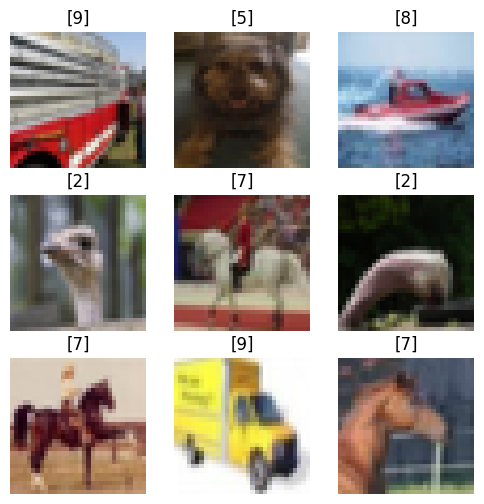

In [14]:
#Lets visualize the CIFAR-10 dataset

import random
figure = plt.figure(figsize=(6,6))

for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])
  plt.title(Y_train[index])
  plt.axis(False)

In [ ]:
"""
So you can probably notice here that the images are 3D(coloured) but still 
not of great quality ( what can you expect from 32x32 image). Also there are
certain other factors which makes the classification a bit tougher than the 
cases of 2D( the digit and the fashion data) you dealt before. We will try to
understand the difficulties and find probable solution for them.
"""

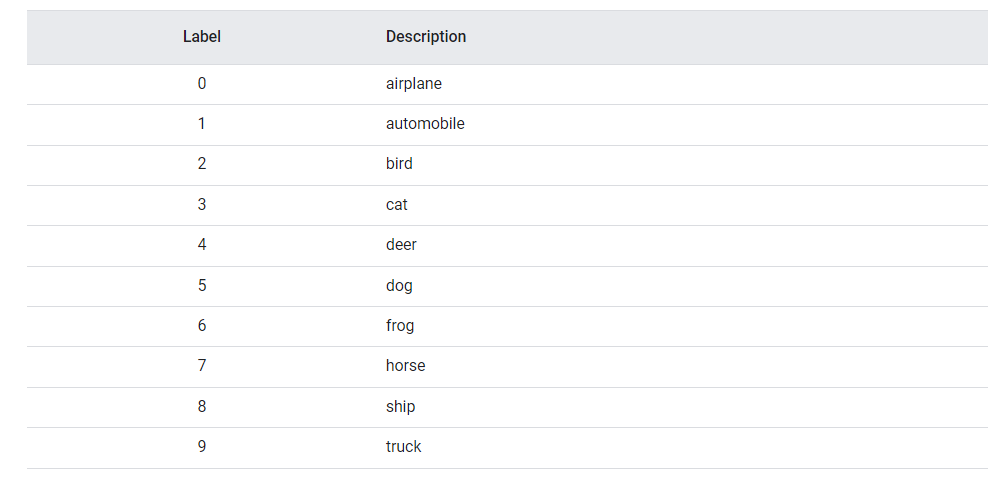

In [ ]:
"""
Lets first start with the CNN model discussed in the class for digit
 classification. Notice that I have changed the input shape for this usecase.
 Earlier it was (28,28,1) for the digit dataset.
"""

In [15]:
# model initialization
cnn_model = tf.keras.Sequential()

# adding the 1st layer of CNN
cnn_model.add(tf.keras.layers.Conv2D(26, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#adding another CNN layer
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [16]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
"""
Explain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]

Answer:
Adaptive Moment Estimation (Adam) is an algorithm for optimization technique for gradient descent. The method is really efficient when working with large problem involving a lot of data or parameters. 
It requires less memory. It is an extension of the stochastic gradient descent (SGD) optimization method that adapts the learning rate for each parameter in the network. 
Adam optimizer combines the advantages of two other optimization algorithms: Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp). 
Like RMSProp, Adam computes the adaptive learning rates for each parameter based on the estimates of both the first moment (mean) and second moment (variance) of the gradients. 
However, it also incorporates the momentum term from SGD, which helps accelerate the convergence.

--Momentum: 
This algorithm is used to accelerate the gradient descent algorithm by taking into consideration the 'exponentially weighted average' of the gradients. 

--Root Mean Square Propagation (RMSP): 
Root mean square prop or RMSprop is an adaptive learning algorithm that tries to improve AdaGrad. 
Instead of taking the cumulative sum of squared gradients like in AdaGrad, it takes the 'exponential moving average'.
Using averages makes the algorithm converge towards the minima in a faster pace.

Adam Optimizer inherits the strengths or the positive attributes of the above two methods and builds upon them to give a more optimized gradient descent. 
Here, we control the rate of gradient descent in such a way that there is minimum oscillation when it reaches the global minimum while taking big enough steps (step-size) 
so as to pass the local minima hurdles along the way. Hence, combining the features of the above methods to reach the global minimum efficiently.

Working of the Adam optimizer:
1. Initializing the first moment (mean) and second moment (variance) of the gradients for each parameter to zero.
2. Compute the gradients of the parameters with respect to the loss function for a batch of training examples.
3. Update the first and second moments.
4. Correct for the bias introduced during the initialization phase.
5. Update the parameters using the computed first and second moments, and repeat all steps until convergence is achieved.

"""

### **Make sure that you are connected to GPU runtime other wise the training in next cell is going to take a long time**

In [17]:
history = cnn_model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
875/875 [==============================] - 6s 4ms/step - loss: 2.5880 - accuracy: 0.1010 - val_loss: 2.3018 - val_accuracy: 0.0964
Epoch 2/10
875/875 [==============================] - 4s 5ms/step - loss: 2.3019 - accuracy: 0.1036 - val_loss: 2.3002 - val_accuracy: 0.1081
Epoch 3/10
875/875 [==============================] - 4s 5ms/step - loss: 2.2998 - accuracy: 0.1023 - val_loss: 2.2980 - val_accuracy: 0.0994
Epoch 4/10
875/875 [==============================] - 4s 4ms/step - loss: 2.3007 - accuracy: 0.1080 - val_loss: 2.2987 - val_accuracy: 0.1077
Epoch 5/10
875/875 [==============================] - 6s 7ms/step - loss: 2.2773 - accuracy: 0.1271 - val_loss: 2.1621 - val_accuracy: 0.2191
Epoch 6/10
875/875 [==============================] - 7s 7ms/step - loss: 2.0540 - accuracy: 0.2491 - val_loss: 1.9202 - val_accuracy: 0.2929
Epoch 7/10
875/875 [==============================] - 5s 5ms/step - loss: 1.8875 - accuracy: 0.3060 - val_loss: 1.9298 - val_accuracy: 0.2999
Epoch 

In [ ]:
""" 
Write about validation accuracy in 100 words.

Answer: 
Validation accuracy is an important metric to evaluate the performance of a model. 
It measures the accuracy of the model's predictions on a separate dataset, which consists of examples that the model has not seen during training (validation dataset). 
The purpose of using a validation set is to assess how well the model generalizes to new, unseen data.
Low validation accuracy suggests that our model is not able to generate patterns from the training data, hence does not fit well for unseen data (validation data).

We can also judge if there is overfitting in our model by comparing validation and train accuracy. If there is a significant gap between the plots of these two, 
it might be a case of overfitting. In the above example, validation accuracy has increased with increasing number of epochs, indicating that our model is getting
trained, and there is no random guessing.

"""

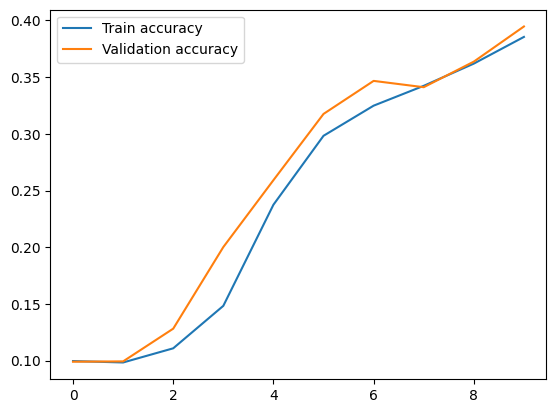

In [10]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
"""
What do you think is happening? Is the model training or not?
 You can see that both the training and validation accuracy are
 just roaming around 0.1. 
 One reason for this can be our model architecture. We had 26 filters
 in our first layer and 16 filters in our next layer. This funnel down approach
 works for dense layers but for Conv layers( which are good at feature extraction)
 we want them to extract more and more features.

 So lets change that to funnel up --> 16 and 32 in the layers respectively


 Answer: 
With increasing number of iterations, both train loss and validation loss decrease- hence the model is training.
But, as mentioned, their accuracies are quite low, which implies that funnelling down (hence reducing the number of features) as in the case of dense layers is not working out 
to give a model that can work well on unseen data (validation set).

"""

In [18]:
# model initialization
cnn_model = tf.keras.Sequential()

"""adding the 1st layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

"""adding the 2nd layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [19]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [20]:
history = cnn_model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20
875/875 [==============================] - 7s 6ms/step - loss: 2.6044 - accuracy: 0.1019 - val_loss: 2.3021 - val_accuracy: 0.1081
Epoch 2/20
875/875 [==============================] - 4s 5ms/step - loss: 2.2985 - accuracy: 0.1054 - val_loss: 2.3006 - val_accuracy: 0.1026
Epoch 3/20
875/875 [==============================] - 4s 4ms/step - loss: 2.2672 - accuracy: 0.1447 - val_loss: 2.1386 - val_accuracy: 0.2179
Epoch 4/20
875/875 [==============================] - 5s 5ms/step - loss: 2.0614 - accuracy: 0.2351 - val_loss: 1.7944 - val_accuracy: 0.3297
Epoch 5/20
875/875 [==============================] - 4s 4ms/step - loss: 1.7026 - accuracy: 0.3788 - val_loss: 1.6220 - val_accuracy: 0.4079
Epoch 6/20
875/875 [==============================] - 4s 4ms/step - loss: 1.5735 - accuracy: 0.4311 - val_loss: 1.5388 - val_accuracy: 0.4483
Epoch 7/20
875/875 [==============================] - 4s 5ms/step - loss: 1.4797 - accuracy: 0.4691 - val_loss: 1.4661 - val_accuracy: 0.4763
Epoch 

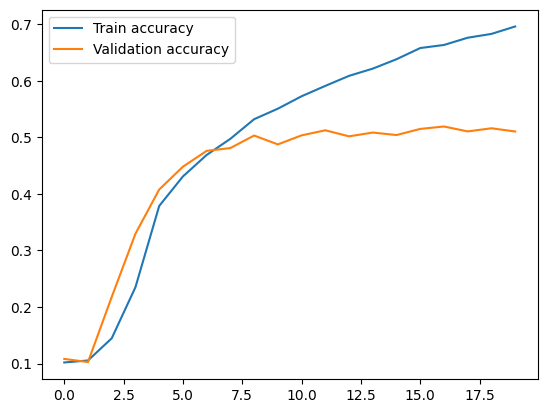

In [21]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
"""
Did our model improve??
Are we done with the job?
What is happening after 5( roughly ) epochs? Why is there a gap between
training and validation accuracy?

Our training accuracy reached to 0.73( and still increasing ) but 
the validation accuracy seems to stagnate at 0.52.

Is our model overfitting on the training data so much that it can't work well 
on unseen data.

Answer: 
Training accuracy has increased, which indicates that the model did improve.
We are not done with the job since validation accuracy and training accuracy seem to diverge.
With increasing epochs, validation loss first decreases, then increases; also there is a significant gap between training and validation accuracy
because there has been overfitting in our model- meaning our model is able to perform well on training set (seen data), but not on unseen data (validation set).


"""

In [ ]:
"""
How are we gonna tackel this problem?
Well, we will see that in next part of this assignment.
Till then let's learn about about overfitting.
"""

> **Well using Chatgpt to answer these question is something which everyone can think of right?? To create a difference write answer in your own terms after reading from web or reading the answer of Chatgpt.**
### **After all this is your midterm evaluation. Cheating is something we can catch easily** ( we have also done this )

In [ ]:
"""
[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not 
considered as cheating as long as you are writing that in your own word
( only problem is the crediblity of its information)

"""

In [ ]:
"""
Question: What are overfitting and underfitting? ( atleast 200 words )

Answer:
1. OVERFITTING-
Overfitting occurs when our machine learning model tries to cover all the data points or more than the required data points present in the given dataset. 
Because of this, the model starts catching noise and inaccurate values present in the dataset, and all these factors reduce the efficiency and accuracy of the model.
Hence, the model does not make accurate predictions on testing data.
The chances of occurrence of overfitting increase as we provide more and more training to our model. 
It means the more we train our model, the more chances of occurring the overfitted model.
Can be overcome by simplifying the model, and splitting the dataset to training, test and validation datasets.

2.UNDERFITTING-
Underfitting occurs when our machine learning model is not able to capture the underlying trend of the data (meaning, it is not able to learn enough from the given data).
It usually happens when we have fewer data to build an accurate model and also when we try to build a linear model with fewer non-linear data.
To avoid the overfitting in the model, the fed of training data can be stopped at an early stage, due to which the model may not learn enough from the training data. 
As a result, it may fail to find the best fit of the dominant trend in the data. 
Hence it reduces the accuracy and produces unreliable predictions. 
In a nutshell, underfitting refers to a model that can neither perform well on the training data nor generalize to new data.
Can be overcome by increasing the training time of the model, and increasing the number of features.

Links: 1. https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/
       2. https://www.javatpoint.com/overfitting-and-underfitting-in-machine-learning
       
"""

In [ ]:
"""
Question: What are regularization techniques in machine learning?(200 words)

Answer: 
Regularization is a technique used in machine learning and deep learning to prevent overfitting and hence improve the generalization performance of a model. 
It involves adding a penalty term to the loss function during training. 
This penalty discourages the model from becoming too complex or having large parameter values, which helps in controlling the model's ability to fit noise in the training data.
In simpler terms, this penalty encourages the model to learn simpler patterns that generalize well to unseen data.
Hnece, the whole point of regularization techniques is to make a simple model, to avoid overfitting.

Some types of regularization techniques:
1. L2 regularization- Also known as Ridge regression.
                      Ridge regression is one of the types of linear regression in which a small amount of bias is introduced so that we can get better long-term predictions.
                      The penalty term regularizes the coefficients of the model, and hence ridge regression reduces the amplitudes of the coefficients that decreases the complexity of the model.
2. L1 regularization- Also known as Lasso regression (Least Absolute Shrinkage and Selection Operator).
                      It is similar to the Ridge Regression except that the penalty term contains only the absolute weights instead of a square of weights.
                      Since it takes absolute values, hence, it can shrink the slope to 0, whereas Ridge Regression can only shrink it near to 0.
Ridge regression is mostly used to reduce the overfitting in the model, and it includes all the features present in the model. It reduces the complexity of the model by shrinking the coefficients.
Lasso regression helps to reduce the overfitting in the model as well as feature selection.

Hence, regularization is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. 
This in turn improves the model's performance on the unseen data as well, thereby reducing overfitting.

Links: 1. https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/
       2. https://www.javatpoint.com/regularization-in-machine-learning
"""

In [ ]:
"""
Question: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)

Answer: 
A dropout layer is a regularization technique commonly used in neural networks, particularly in deep learning models. 
It is designed to prevent overfitting, which occurs when a model becomes too specialized to the training data and performs poorly on unseen data. 
The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. 
Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.
This technique minimizes overfitting because each neuron becomes independently sufficient, in the sense that the neurons within the layers learn weight values that are not based on the cooperation of its neighbouring neurons.
During the training phase, a dropout layer randomly sets a fraction of input units to zero at each update. 
These "dropped out" units are effectively ignored by the subsequent layers during that particular forward and backward pass. 
The fraction of units to be dropped out is typically set as a hyperparameter and can vary between different layers of the network.
Hence, it reduces the interdependencies between neurons and helps to avoid over-reliance on a small subset of features.
This, in turn, can lead to better performance on unseen data, as the model becomes less sensitive to the specific details of the training set.

Links: 1. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout#:~:text=The%20Dropout%20layer%20randomly%20sets,over%20all%20inputs%20is%20unchanged.
       2. https://towardsdatascience.com/understanding-and-implementing-dropout-in-tensorflow-and-keras-a8a3a02c1bfa
"""

In [ ]:
"""
Question: What is L1 normalization? write its formulae as well( atleast 200 words )

Answer: 
Also known as Lasso regression (Least Absolute Shrinkage and Selection Operator).
L1 regularization is the preferred choice when having a high number of features as it provides sparse solutions. 
Even, we obtain the computational advantage because features with zero coefficients can be avoided.
This method adds 'absolute value of magnitude' of coefficient as penalty term to the loss function.
In L1 normalization, the regularization term is defined as the sum of the absolute values of the model's coefficients, multiplied by a regularization parameter (λ). 
The objective function, including the L1 regularization term, is then minimized during the training process. 
The formula for L1 normalization can be represented as follows:
L1 regularization term = λ * ∑|w|,
where: λ is the regularization parameter that controls the impact of the regularization term.
       w represents the model's weights.
Now our aim will be to minimize the new loss function (including the L1 penalty term).
This encourages the model to reduce the impact of less important features by shrinking their coefficients towards zero.
If λ is zero then we will get back OLS (ordinary least squares) whereas very large value will make coefficients zero hence it will under-fit.
Consequently, the L1 regularization promotes feature selection, as it encourages many coefficients to become exactly zero, effectively removing irrelevant features from the model.

Links: 1. https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
       2. https://www.analyticssteps.com/blogs/l2-and-l1-regularization-machine-learning
       3. https://medium.com/analytics-vidhya/regularization-understanding-l1-and-l2-regularization-for-deep-learning-a7b9e4a409bf

"""

In [ ]:
"""
Question: What is L2 normalization? write its formulae as well( atleast 200 words )

Answer: 
Also known as Ridge regression.
Regularization adds the penalty as model complexity increases. 
The regularization parameter (lambda) penalizes all the parameters except intercept so that the model generalizes the data and does not overfit. 
Ridge regression adds 'squared magnitude of the coefficient' as penalty term to the loss function.
In L2 normalization, the regularization term is defined as the sum of the squared magnitudes of the model's coefficients, multiplied by a regularization parameter (λ). 
The objective function, including the L2 regularization term, is then minimized during the training process. 
The formula for L2 normalization can be represented as follows:
L2 regularization term = λ * ∑(w^2),
where: λ is the regularization parameter that controls the impact of the regularization term.
       w represents the model's weights.
Ridge regularization forces the weights to be small but does not make them zero and does not give the sparse solution.
Ridge is not robust to outliers as square terms blow up the error differences of the outliers, and the regularization term tries to fix it by penalizing the weights.
Ridge regression performs better when all the input features influence the output, and all with weights are of roughly equal size.
L2 regularization can learn complex data patterns.

Links: 1. https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
       2. https://www.analyticssteps.com/blogs/l2-and-l1-regularization-machine-learning
       3. https://medium.com/analytics-vidhya/regularization-understanding-l1-and-l2-regularization-for-deep-learning-a7b9e4a409bf
"""

In [ ]:
"""
Question: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )

Answer: 
Data augmentation is also a type of regularization technique.
Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data. 
It includes making minor changes to the dataset or using deep learning to generate new data points. 
Augmented data is driven from original data with some minor changes. 
For example, in the case of image augmentation, we make geometric and color space transformations (flipping, resizing, cropping, brightness, contrast) to increase the size and diversity of the training set.
When to use Data augmentation: 1. To prevent models from overfitting.
                               2. The initial training set is too small.
                               3. To improve the model accuracy.
                               4. To reduce the operational cost of labeling and cleaning the raw dataset.
By applying diverse transformations to the data, data augmentation helps the model generalize better to new, unseen samples.
Since machine learning models often require a large amount of labeled data to achieve good performance, data augmentation helps overcome limitations when only a limited dataset is available.
Hence, apart from solving the issue of overfitting, it can also solve underfitting by increasing our dataset.
The data augmentation tools make the data rich and sufficient and thus makes the model perform better and accurately. 
Data augmentation techniques reduce the operational costs by introducing transformation in the datasets.
It assists in data cleaning, which is essential for high accuracy models and makes machine learning more robust by creating variations in the model.

Links: 1. https://www.datacamp.com/tutorial/complete-guide-data-augmentation
       2. https://www.analyticssteps.com/blogs/data-augmentation-techniques-benefits-and-applications
"""